![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [13]:
from QuantConnect.Indicators import ExponentialMovingAverage
from QuantConnect import Resolution
from QuantConnect.Research import QuantBook

# QuantBook Analysis Tool
# For more information see https://www.quantconnect.com/docs/research/overview
qb = QuantBook()
crypto = qb.AddCrypto("BTCUSD", Resolution.Daily)
symbol = crypto.Symbol
history = qb.History(symbol, 10, Resolution.Daily)

# Indicator Analysis
ema = qb.Indicator(ExponentialMovingAverage(10), crypto.Symbol, 360, Resolution.Daily)
ema.plot()

TypeError: no numeric data to plot

In [ ]:
from QuantConnect import *

In [ ]:
from sklearn.linear_model import LinearRegression

qb = QuantBook()
spy = qb.AddEquity("SPY")

Machine Learning

In [14]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import json
from keras.utils.generic_utils import serialize_keras_object

In [ ]:
qb = QuantBook()
spy = qb.AddEquity("SPY", Resolution.Daily)
history = qb.History(spy.Symbol, 360, Resolution.Daily)
close_price = history.loc["SPY"]

In [ ]:
# function to prepare our data for training our NN
def prep_data(data, n_tsteps=5):
    # n_tsteps is the number of time steps at and before time t we want to use
    #   to predict the close price at time t + 1

    # this helps making the data stationary
    df = data.pct_change()[1:]

    features = []
    labels = []

    for i in range(len(df)-n_tsteps):
        input_data = df.iloc[i:i+n_tsteps].values
        features.append(input_data)
        label = df['close'].iloc[i+n_tsteps]
        labels.append(label)

    return np.array(features), np.array(labels)

In [ ]:
def build_model():
        # Call Sequential for multi-layer neural network basis.
        model = Sequential([
            # Dense is a perceptron layer, with number of neurones and activation function.
            # If this is the first layer, an `input_shape` is necessary to tell the model the input data shape.
            # 5 input variables (OHLCV) by 5 time steps
            Dense(10, input_shape=(5,5), activation='relu'),
            Dense(10, activation='relu'),
            # Flatten layer required because input shape is 2D
            Flatten(),
            # Last layer will export the regression value. Since we are performing regression, we only need 1 output node
            Dense(1)
        ])

        # All models required compilation, with loss function, optimizer and optimization metric(s) arguemnts.
        model.compile(loss='mse',
                    optimizer=RMSprop(0.001),
                    metrics=['mae', 'mse'])
        return model

In [ ]:
X, y = prep_data(close_price)

In [ ]:
model = build_model()

In [ ]:
X_train = X[:300]
X_test = X[300:]
y_train = y[:300]
y_test = y[300:]

In [ ]:
model.fit(X_train, y_train, epochs=5)

Analyze Performance

<AxesSubplot:title={'center':'Model Performance: predicted vs actual %change in closing price'}>

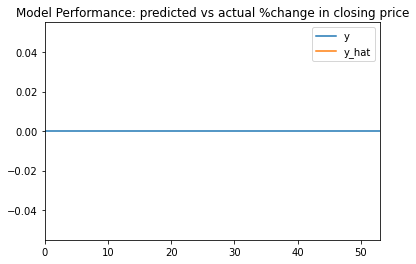

In [15]:
y_hat = model.predict(X_test)
df = pd.DataFrame({'y': y_test.flatten(), 'y_hat': y_hat.flatten()})
df.plot(title='Model Performance: predicted vs actual %change in closing price')

In [16]:
model_key = 'spy_model'

modelStr = json.dumps(serialize_keras_object(model))
qb.ObjectStore.Save(model_key, modelStr)

True

In [17]:
if qb.ObjectStore.ContainsKey(model_key):
    modelStr = qb.ObjectStore.Read(model_key)
    config = json.loads(modelStr)['config']
    loaded_model = Sequential.from_config(config)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<AxesSubplot:title={'center':'Model Performance: predicted vs actual %change in closing price'}>

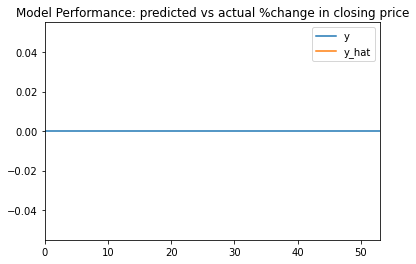

In [18]:
y_hat = loaded_model.predict(X_test)
df = pd.DataFrame({'y': y_test.flatten(), 'y_hat': y_hat.flatten()})
df.plot(title='Model Performance: predicted vs actual %change in closing price')